<a href="https://colab.research.google.com/github/dayrlbren/PROBA/blob/main/PROBA6X6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🎲 2


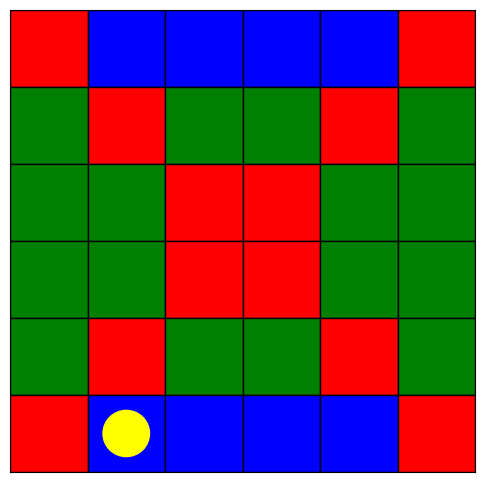

Pergunta: Se um dado de 8 faces é lançado, qual a chance de sair um número par?


Button(description='1/2', style=ButtonStyle())

Button(description='1/4', style=ButtonStyle())

Button(description='3/4', style=ButtonStyle())

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output
import time
import threading

# Definição das cores e pontuações
pontos_cor = {
    "• Azul🟦": 5,
    "• vermelho 🟥 ": 3,
    "• Verde 🟩": 2,

}

# Tela inicial com as regras
def tela_inicial():
    clear_output()
    print("Bem-vindo ao jogo de tabuleiro de probabilidade!🎲""\n")
    print("📌 **REGRAS DO JOGO** 📌""\n")
    print("➖ Cada jogador lançará 2 vezes o dado.")
    print("➖ Cada cor terá pontuações específicas:")
    for cor, valor in pontos_cor.items():
        print(f"  - {cor.capitalize()}: {valor} pontos")
    print("➖ Cada jogador terá 40 segundos para responder a questão.")
    print("➖ Caso o tempo acabe ou a resposta esteja incorreta, passa a vez.")
    print("➖ O campeão é quem acumular 10 pontos primeiro ou tirar a casa premiada.🏆")

tempo_label = widgets.Label(value="⏳ Tempo restante: 40 segundos")

def atualizar_tempo_label(valor):
    tempo_label.value = f"⏳ Tempo restante: {valor} segundos"
    display(tempo_label)

def iniciar_temporizador(callback):
    def contar_tempo():
        global tempo_expirado
        for i in range(40, 0, -1):
            if tempo_expirado:
                return
            clear_output(wait=True)
            atualizar_tempo_label(i)
            time.sleep(1)
        callback()

    timer_thread = threading.Thread(target=contar_tempo)
    timer_thread.start()

# Função para perguntar ao jogador
def fazer_pergunta(coordenada):
    global jogador_atual, pontos, tempo_expirado

    if coordenada == (5, 5):
        print(f"🎉 Jogador {jogador_atual} venceu diretamente!")
        return

    if coordenada in perguntas:
        questao, opcoes, resposta = perguntas[coordenada]
        print(f"Pergunta: {questao}")
        display(tempo_label)
        botoes = [widgets.Button(description=op) for op in opcoes]

        def verificar_resposta(event):
            global tempo_expirado
            tempo_expirado = False
            clear_output()
            desenhar_tabuleiro(coordenada)
            cor_casa = cores[coordenada[0]-1][coordenada[1]-1]
            if not tempo_expirado and event.description == resposta:
                pontos[jogador_atual] += pontos_cor[cor_casa]
                print(f"✅ Resposta correta! Jogador {jogador_atual} ganha {pontos_cor[cor_casa]} pontos (Cor: {cor_casa}).")
            else:
                print("❌ Tempo esgotado ou resposta errada! Você perdeu a vez.")

            print(f"Pontuação Jogador 1: {pontos[1]} | Jogador 2: {pontos[2]}")
            if pontos[jogador_atual] >= 10:
                print(f"🎉 Jogador {jogador_atual} venceu!")
                return

            proximo_turno()

        def tempo_excedido():
            global tempo_expirado
            tempo_expirado = True
            clear_output()
            print("⏳ Tempo esgotado! Passando a vez...")
            proximo_turno()

        tempo_expirado = False
        iniciar_temporizador(tempo_excedido)

        for botao in botoes:
            botao.on_click(verificar_resposta)
            display(botao)
    else:
        proximo_turno()

tela_inicial()# Passo 1: Criar um dado de 6 faces com animação
def animar_dado():
    print("Girando o dado...")
    for _ in range(10):
        valor = random.randint(1, 6)
        clear_output(wait=True)
        print(f"🎲 {valor}")
        time.sleep(0.1)
    return valor

# Passo 2: Criar o tabuleiro 6x6 com as cores e pontuações
cores = [
    ['red', 'blue', 'blue', 'blue', 'blue', 'red'],
    ['green', 'red', 'green', 'green', 'red', 'green'],
    ['green', 'green', 'red', 'red', 'green', 'green'],
    ['green', 'green', 'red', 'red', 'green', 'green'],
    ['green', 'red', 'green', 'green', 'red', 'green'],
    ['red', 'blue', 'blue', 'blue', 'blue', 'red']
]

pontos_cor = {
    'red': 3,
    'green': 2,
    'blue': 5
}

# Perguntas de probabilidade
perguntas = {
    (1, 1): ("Qual a probabilidade de sair um número par ao lançar um dado de 6 faces?", ["1/2", "1/3", "2/3"], "1/2"),
    (1, 2): ("Se um baralho tem 52 cartas, qual a chance de tirar um Ás?", ["1/13", "1/26", "1/52"], "1/13"),
    (1, 3): ("Qual a probabilidade de sair um número primo ao lançar um dado de 6 faces?", ["1/2", "1/3", "1/6"], "1/2"),
    (1, 4): ("Se você jogar uma moeda justa, qual a chance de sair cara?", ["1/2", "1/3", "1/4"], "1/2"),
    (1, 5): ("Em um baralho, qual a probabilidade de tirar uma carta vermelha?", ["1/2", "1/4", "3/4"], "1/2"),
    (1, 6): ("Qual a probabilidade de tirar uma bola azul de um saco com 3 azuis e 7 vermelhas?", ["3/10", "7/10", "1/2"], "3/10"),
    (2, 1): ("Se um dado justo é lançado, qual a chance de sair um número maior que 4?", ["1/3", "1/6", "1/2"], "1/3"),
    (2, 2): ("Se um número é escolhido ao acaso de 1 a 10, qual a probabilidade de ser um múltiplo de 3?", ["2/5", "1/3", "3/10"], "3/10"),
    (2, 3): ("Se um saco tem 5 bolas verdes e 5 bolas amarelas, qual a chance de tirar uma bola verde?", ["1/2", "1/3", "2/5"], "1/2"),
    (2, 4): ("Se um dado é lançado duas vezes, qual a chance de sair dois números ímpares?", ["1/4", "1/2", "1/3"], "1/4"),
    (2, 5): ("Em um grupo de 20 pessoas, qual a chance de escolher aleatoriamente alguém que faz aniversário em janeiro?", ["1/12", "1/10", "1/6"], "1/12"),
    (2, 6): ("Se um baralho tem 52 cartas, qual a chance de tirar uma carta de Copas?", ["1/4", "1/13", "1/26"], "1/4"),
    (3, 1): ("Se um número é escolhido de 1 a 20, qual a probabilidade de ser um número primo?", ["2/5", "1/4", "1/2"], "2/5"),
    (3, 2): ("Se um dado é lançado, qual a chance de sair um número menor que 3?", ["1/3", "1/6", "1/2"], "1/3"),
    (3, 3): ("Se uma moeda honesta é jogada 3 vezes, qual a chance de sair três caras?", ["1/8", "1/4", "1/2"], "1/8"),
    (3, 4): ("Se um dado de 8 faces é lançado, qual a chance de sair um número maior que 6?", ["1/4", "1/2", "1/8"], "1/4"),
    (3, 5): ("Se uma senha de 4 dígitos é criada com números de 0 a 9, qual a chance de ser 1234?", ["1/1000", "1/10000", "1/9999"], "1/10000"),
    (3, 6): ("Se um dado justo é lançado, qual a chance de sair um número ímpar?", ["1/2", "1/3", "2/3"], "1/2"),
    (4, 1): ("Se uma roleta tem 12 números, qual a probabilidade de cair em um número maior que 9?", ["1/4", "1/3", "1/2"], "1/4"),
    (4, 2): ("Se um baralho tem 52 cartas, qual a chance de tirar um Rei ou uma Dama?", ["2/13", "1/13", "1/26"], "2/13"),
    (4, 3): ("Se um número de 1 a 50 é escolhido ao acaso, qual a probabilidade de ser múltiplo de 5?", ["1/5", "1/10", "1/4"], "1/5"),
    (4, 4): ("Se uma moeda é lançada 2 vezes, qual a chance de sair pelo menos uma cara?", ["3/4", "1/2", "1/4"], "3/4"),
    (4, 5): ("Se um dado é lançado, qual a chance de sair um número maior que 2 e menor que 5?", ["1/3", "1/6", "1/2"], "1/3"),
    (4, 6): ("Se uma urna tem 3 bolas vermelhas, 4 azuis e 3 verdes, qual a chance de tirar uma azul?", ["2/5", "3/10", "2/3"], "2/5"),
    (5, 1): ("Se um número é escolhido de 1 a 100, qual a probabilidade de ser múltiplo de 10?", ["1/10", "1/5", "1/20"], "1/10"),
    (5, 2): ("Se um dado é lançado, qual a chance de sair um número diferente de 6?", ["5/6", "1/6", "1/3"], "5/6"),
    (5, 3): ("Se uma moeda honesta é jogada 4 vezes, qual a chance de sair exatamente duas caras?", ["3/8", "1/2", "1/4"], "3/8"),
    (5, 4): ("Se um baralho tem 52 cartas, qual a chance de tirar uma carta que não seja de Espadas?", ["3/4", "1/4", "2/3"], "3/4"),
    (5, 5): ("Se um dado justo é lançado, qual a probabilidade de sair um 6?", ["1/6", "1/3", "1/12"], "1/6"),  # Casa especial
    (5, 6): ("Se uma roleta tem 10 números, qual a chance de cair em um número ímpar?", ["1/2", "2/5", "3/10"], "1/2"),
    (6, 1): ("Se um número é escolhido ao acaso de 1 a 200, qual a probabilidade de ser múltiplo de 25?", ["1/25", "1/20", "1/10"], "1/10"),
    (6, 2): ("Se um dado de 8 faces é lançado, qual a chance de sair um número par?", ["1/2", "1/4", "3/4"], "1/2"),
    (6, 3): ("Se um baralho tem 52 cartas, qual a chance de tirar um número maior que 10?", ["3/13", "1/4", "1/3"], "3/13"),
    (6, 4): ("Se uma moeda é lançada 5 vezes, qual a chance de sair todas as caras?", ["1/32", "1/16", "1/64"], "1/32"),
    (6, 5): ("Se um dado é lançado duas vezes, qual a chance de sair um total de 7?", ["1/6", "1/12", "1/8"], "1/6"),
    (6, 6): ("Se uma urna tem 4 bolas verdes, 3 azuis e 3 vermelhas, qual a chance de tirar uma verde?", ["2/5", "4/10", "1/3"], "2/5"),
    # Adicione todas as 35 perguntas aqui
}

# Função para desenhar o tabuleiro
def desenhar_tabuleiro(marcador=None):
    fig, ax = plt.subplots(figsize=(6, 6))
    for i in range(6):
        for j in range(6):
            cor = cores[i][j]
            rect = plt.Rectangle((j, 5 - i), 1, 1, facecolor=cor, edgecolor='black')
            ax.add_patch(rect)
            if marcador == (i+1, j+1):
                circ = plt.Circle((j + 0.5, 5.5 - i), 0.3, color='yellow')
                ax.add_patch(circ)
    ax.set_xlim(0, 6)
    ax.set_ylim(0, 6)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

# Variáveis de estado
dados_girados = []
pontos = {1: 0, 2: 0}
jogador_atual = 1

# Função para perguntar ao jogador
def fazer_pergunta(coordenada):
    global jogador_atual, pontos
    if coordenada == (5, 5):
        print(f"🎉 Jogador {jogador_atual} venceu diretamente!")
        return

    if coordenada in perguntas:
        questao, opcoes, resposta = perguntas[coordenada]
        print(f"Pergunta: {questao}")
        botoes = [widgets.Button(description=op) for op in opcoes]

        def verificar_resposta(event):
            clear_output()
            desenhar_tabuleiro(coordenada)
            if event.description == resposta:
                pontos[jogador_atual] += pontos_cor[cores[coordenada[0]-1][coordenada[1]-1]]
                print(f"✅ Resposta correta! Jogador {jogador_atual} ganha {pontos_cor[cores[coordenada[0]-1][coordenada[1]-1]]} pontos.")
            else:
                print("❌ Resposta errada! Você perdeu a vez.")

            print(f"Pontuação Jogador 1: {pontos[1]} | Jogador 2: {pontos[2]}")
            if pontos[jogador_atual] >= 10:
                print(f"🎉 Jogador {jogador_atual} venceu!")
                return

            proximo_turno()

        for botao in botoes:
            botao.on_click(verificar_resposta)
            display(botao)
    else:
        proximo_turno()

# Função para trocar de turno
def proximo_turno():
    global jogador_atual, dados_girados
    jogador_atual = 2 if jogador_atual == 1 else 1
    dados_girados = []
    print(f"Agora é a vez do Jogador {jogador_atual}!")
    display(girar_dado_botao)

# Função de jogada
def jogar_turno_interativo(_):
    global dados_girados
    valor = animar_dado()
    dados_girados.append(valor)

    if len(dados_girados) < 2:
        print(f"Primeiro dado: {valor}. Gire novamente.")
        display(girar_dado_botao)
    else:
        x, y = dados_girados
        coordenada = (x, y)
        desenhar_tabuleiro(coordenada)
        fazer_pergunta(coordenada)

# Botões
girar_dado_botao = widgets.Button(description="Girar Dado", button_style='info')
girar_dado_botao.on_click(jogar_turno_interativo)

# Função para iniciar o jogo
def iniciar_jogo(_):
    global pontos, jogador_atual, dados_girados
    pontos = {1: 0, 2: 0}
    jogador_atual = 1
    dados_girados = []
    clear_output()
    print("Jogo Iniciado! Vez do Jogador 1!")
    display(girar_dado_botao)

# Botão de início do jogo
botao_iniciar = widgets.Button(description="Iniciar Jogo", button_style='success')
botao_iniciar.on_click(iniciar_jogo)
display(botao_iniciar)





